## Q1 – Moyenne mobile et dépassement

In [21]:

import numpy as np

conso = np.random.randint(220, 360, size=30)

# Moyenne mobile sur 5 jours
moy_mob = np.array([conso[i:i+5].mean() for i in range(len(conso)-4)])

# Identifier les jours où la conso dépasse la moyenne mobile de 15%
conso_aligné = conso[4:]
jours_depassement = np.where(conso_aligné > moy_mob * 1.15)[0]
print("Indices des jours avec dépassement :", jours_depassement)
print("Valeurs :", conso_aligné[jours_depassement])


Indices des jours avec dépassement : [ 4 10 12]
Valeurs : [341 339 358]


## Q2 – Graphe de la consommation

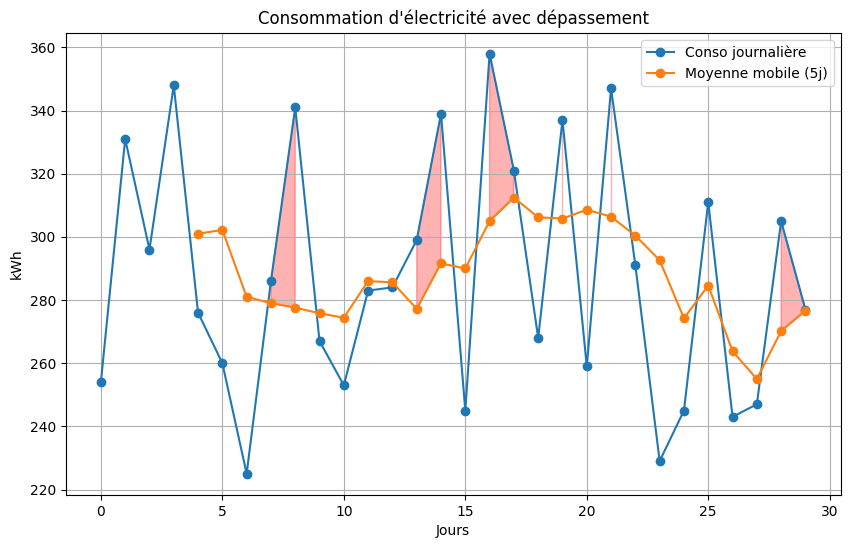

In [22]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(conso, label="Conso journalière", marker="o")
plt.plot(range(4,30), moy_mob, label="Moyenne mobile (5j)", marker="o")

# Remplir zone rouge si dépassement
plt.fill_between(range(4,30), conso_aligné, moy_mob, where=conso_aligné > moy_mob, color='red', alpha=0.3)

plt.title("Consommation d'électricité avec dépassement")
plt.xlabel("Jours")
plt.ylabel("kWh")
plt.legend()
plt.grid(True)
plt.show()


## Q3 – Jeu aléatoire jusqu'à seuil

In [23]:

def jouer(seuil):
    total = 0
    lancers = []
    while total <= seuil:
        tirage = np.random.randint(1, 7)
        lancers.append(tirage)
        total += tirage
    return len(lancers), total, lancers

# Exemple
n, s, l = jouer(100)
print(f"Nombre de lancers: {n}, Somme: {s}")
print("Lancers:", l)


Nombre de lancers: 30, Somme: 103
Lancers: [1, 3, 4, 4, 4, 5, 2, 1, 6, 6, 3, 4, 3, 2, 3, 3, 4, 1, 6, 1, 6, 4, 3, 5, 1, 3, 2, 3, 4, 6]


## Q4 – Histogramme de loi normale

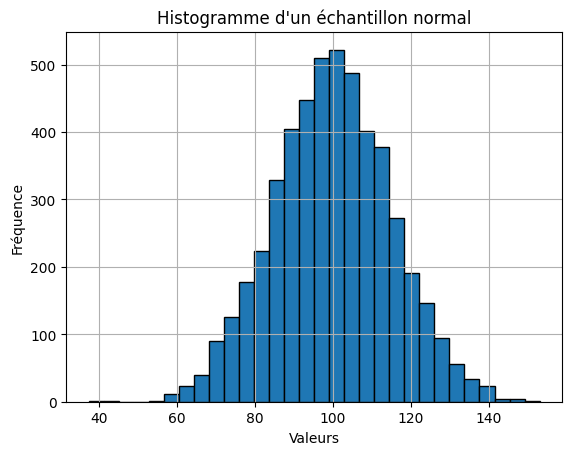

Pourcentage entre 85 et 115 : 68.14%


In [24]:

echantillon = np.random.normal(100, 15, 5000)

plt.hist(echantillon, bins=30, edgecolor='black')
plt.title("Histogramme d'un échantillon normal")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

# Pourcentage entre 85 et 115
prop = ((echantillon >= 85) & (echantillon <= 115)).mean() * 100
print(f"Pourcentage entre 85 et 115 : {prop:.2f}%")


## Q5 – Analyse de scores

In [82]:

scores = np.random.randint(12, 31, size=20)

# Classement décroissant
sorted_scores = np.sort(scores)[::-1]

# Courbe cumulative
cum = np.cumsum(sorted_scores)
cum_pct = cum / cum[-1] * 100
print("Scores triés :", sorted_scores)
print("Cumul (%) :", cum_pct)

# Identifier combien d'étudiants font 50% des points
n_top = np.argmax(cum_pct >= 90) + 1
print(np.where(cum_pct >= 90))
print(f"\nNombre minimum d'étudiants pour 50%% des points : {n_top}")

Scores triés : [30 29 28 27 27 27 26 26 25 22 22 22 20 17 17 17 16 16 15 13]
Cumul (%) : [  6.78733032  13.34841629  19.68325792  25.7918552   31.90045249
  38.00904977  43.89140271  49.77375566  55.42986425  60.40723982
  65.38461538  70.36199095  74.88687783  78.73303167  82.57918552
  86.42533937  90.04524887  93.66515837  97.05882353 100.        ]
(array([16, 17, 18, 19]),)

Nombre minimum d'étudiants pour 50%% des points : 17
